In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv/train.csv')
data.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [3]:
df_label = data.drop(['id', 'comment_text'], axis = 1)
count = []
label = list(df_label.columns.values)
for i in label:
    count.append((i, df_label[i].sum()))
df_stat = pd.DataFrame(data = count, columns = ['label', 'counts'])
df_stat

,label,counts
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


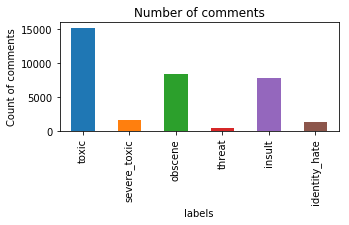

In [4]:
df_stat.plot(x = 'label', y = 'counts', legend = False, kind = 'bar', figsize = (5, 2))
plt.title('Number of comments')
plt.xlabel('labels', fontsize = 10)
plt.ylabel('Count of comments', fontsize = 10)
plt.show()

Text(0.5,0,'# of categories')

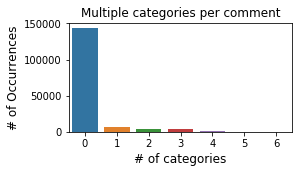

In [5]:
import seaborn as sns
rowsum = df_label.sum(axis = 1)
x = rowsum.value_counts()

#plot
plt.figure(figsize=(4,2))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

In [6]:
print('Percentage of comments that are not labelled:')
print(len(df_label[(df_label['toxic']==0) & (df_label['severe_toxic']==0) & (df_label['obscene']==0) & (df_label['threat']== 0) & (df_label['insult']==0) & (df_label['identity_hate']==0)]) / len(df_label))

Percentage of comments that are not labelled:
0.8983211235124177


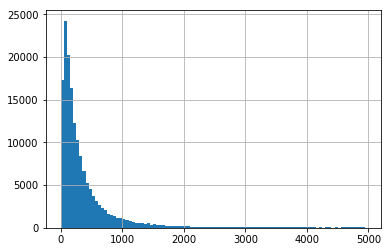

In [7]:
lens = data.comment_text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [8]:
print('Number of missing comments in comment text:')
data['comment_text'].isnull().sum()

Number of missing comments in comment text:


0

In [9]:
y_value_counts = df_stat['counts']
print("Comment - Identity hate", y_value_counts[5], ", (", (y_value_counts[5]/(y_value_counts[5]+y_value_counts[4]+y_value_counts[3]+y_value_counts[2]+y_value_counts[1]+y_value_counts[0]))*100, "%)")

print("Comment - Insult", y_value_counts[4], ", (", (y_value_counts[4]/(y_value_counts[5]+y_value_counts[4]+y_value_counts[3]+y_value_counts[2]+y_value_counts[1]+y_value_counts[0]))*100, "%)")

print("Comment - threat", y_value_counts[3], ", (", (y_value_counts[3]/(y_value_counts[5]+y_value_counts[4]+y_value_counts[3]+y_value_counts[2]+y_value_counts[1]+y_value_counts[0]))*100, "%)")

print("Comment - Obscene", y_value_counts[2], ", (", (y_value_counts[2]/(y_value_counts[5]+y_value_counts[4]+y_value_counts[3]+y_value_counts[2]+y_value_counts[1]+y_value_counts[0]))*100, "%)")

print("Comment - Severe toxic", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[5]+y_value_counts[4]+y_value_counts[3]+y_value_counts[2]+y_value_counts[1]+y_value_counts[0]))*100, "%)")

print('Comment - toxic', y_value_counts[0],", (", (y_value_counts[0]/(y_value_counts[5]+y_value_counts[4]+y_value_counts[3]+y_value_counts[2]+y_value_counts[1]+y_value_counts[0]))*100, "%)")

Comment - Identity hate 1405 , ( 4.0030770984101665 %)
Comment - Insult 7877 , ( 22.442874237848308 %)
Comment - threat 478 , ( 1.3619009630178358 %)
Comment - Obscene 8449 , ( 24.072596729158356 %)
Comment - Severe toxic 1595 , ( 4.544418485383782 %)
Comment - toxic 15294 , ( 43.57513248618155 %)


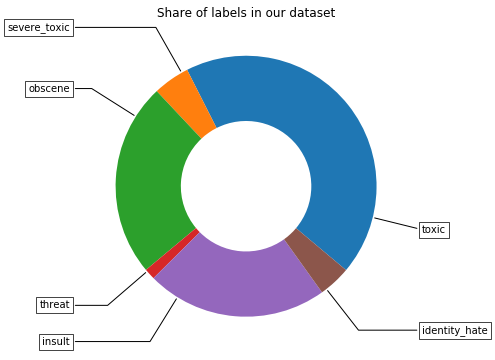

In [10]:
fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(aspect = 'equal'))
recipe = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

data = [y_value_counts[0], y_value_counts[1], y_value_counts[2], y_value_counts[3], y_value_counts[4], y_value_counts[5]]

wedges, texts = ax.pie(data, wedgeprops = dict(width = 0.5), startangle = -40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/6. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


ax.set_title('Share of labels in our dataset')
plt.show()